In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("marketing_campaign.csv", sep="\t")



In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
df['Income'] = df['Income'].fillna(df['Income'].median())


In [7]:
df['Age'] = 2024 - df['Year_Birth']


In [8]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Age                    0
dtype: int64

In [9]:
features = df[['Age', 'Income', 
               'MntWines', 'MntFruits', 
               'MntMeatProducts']]


In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [12]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)


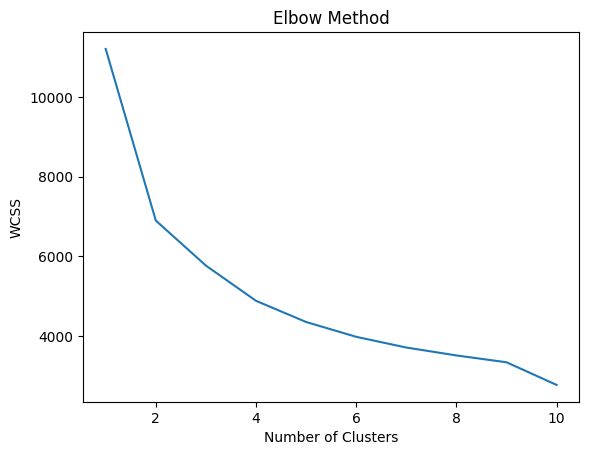

In [13]:
plt.plot(range(1, 11), wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


In [14]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)


In [15]:
df.groupby('Cluster')[['Age', 'Income', 
                       'MntWines', 
                       'MntMeatProducts']].mean()


,Age,Income,MntWines,MntMeatProducts
Cluster,,,,
0,46.764294,34785.981330,64.680280,35.266044
1,66.493578,46820.566055,162.040367,56.300917
2,53.312303,77746.723975,542.318612,519.946372
3,58.385797,71091.284069,700.879079,284.525912


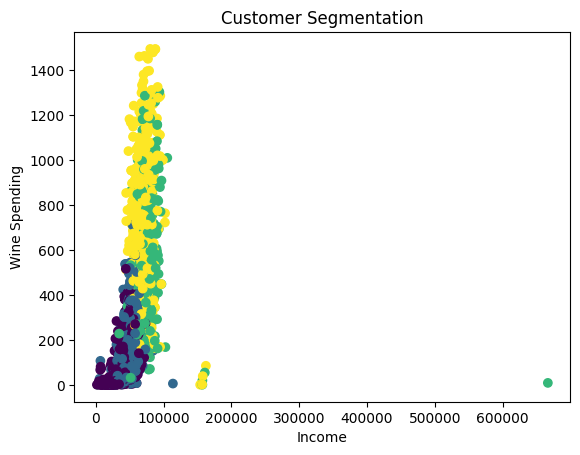

In [16]:
plt.scatter(df['Income'], df['MntWines'], c=df['Cluster'])
plt.xlabel("Income")
plt.ylabel("Wine Spending")
plt.title("Customer Segmentation")
plt.show()


In [17]:
clusters = df['Cluster'].unique()


In [18]:
markers = ['o', 's', '^', 'D', 'X']  # circle, square, triangle, diamond


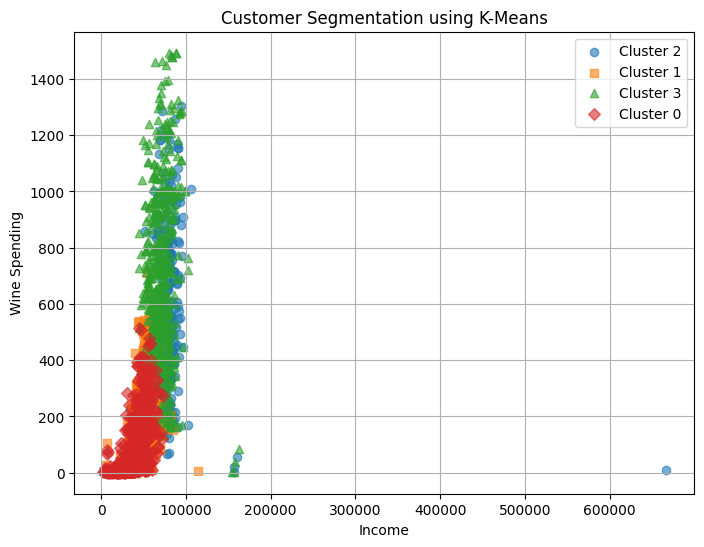

In [19]:
plt.figure(figsize=(8, 6))

for i, cluster in enumerate(clusters):
    subset = df[df['Cluster'] == cluster]
    
    plt.scatter(
        subset['Income'],
        subset['MntWines'],
        marker=markers[i],
        label=f'Cluster {cluster}',
        alpha=0.6  # overlap kam karega
    )

plt.xlabel("Income")
plt.ylabel("Wine Spending")
plt.title("Customer Segmentation using K-Means")
plt.legend()
plt.grid(True)
plt.show()


In [21]:

from sklearn.decomposition import PCA


In [22]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_features)


In [23]:
pca_df = pd.DataFrame(
    pca_data,
    columns=['PC1', 'PC2']
)

pca_df['Cluster'] = df['Cluster']


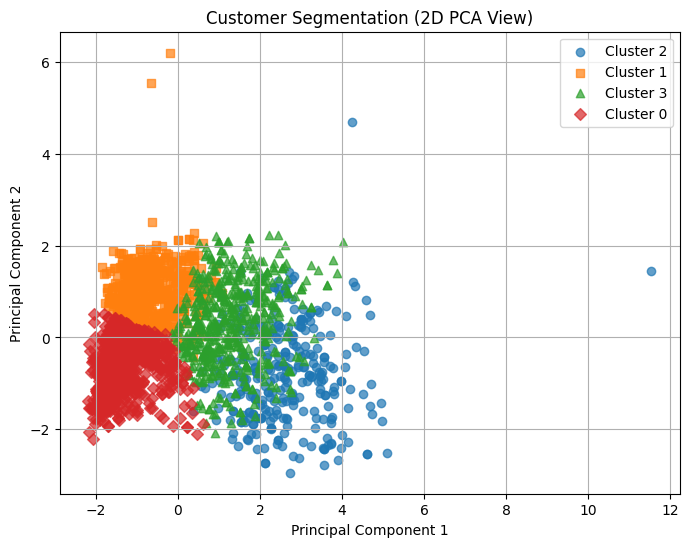

In [24]:
plt.figure(figsize=(8, 6))

markers = ['o', 's', '^', 'D', 'X']

for i, cluster in enumerate(pca_df['Cluster'].unique()):
    subset = pca_df[pca_df['Cluster'] == cluster]
    
    plt.scatter(
        subset['PC1'],
        subset['PC2'],
        marker=markers[i],
        alpha=0.7,
        label=f'Cluster {cluster}'
    )

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Customer Segmentation (2D PCA View)")
plt.legend()
plt.grid(True)
plt.show()


In [25]:
centers = pca.transform(kmeans.cluster_centers_)


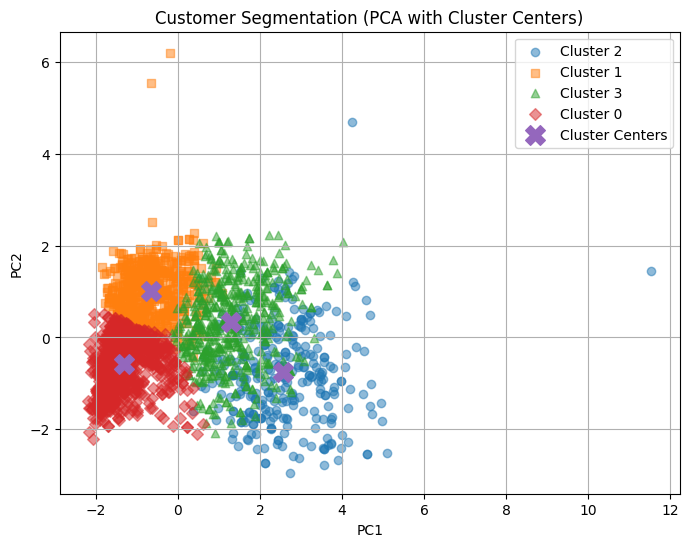

In [26]:
plt.figure(figsize=(8, 6))

markers = ['o', 's', '^', 'D', 'X']

for i, cluster in enumerate(pca_df['Cluster'].unique()):
    subset = pca_df[pca_df['Cluster'] == cluster]
    
    plt.scatter(
        subset['PC1'],
        subset['PC2'],
        marker=markers[i],
        alpha=0.5,
        label=f'Cluster {cluster}'
    )

# Cluster centers
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    marker='X',
    s=200,
    label='Cluster Centers'
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Customer Segmentation (PCA with Cluster Centers)")
plt.legend()
plt.grid(True)
plt.show()


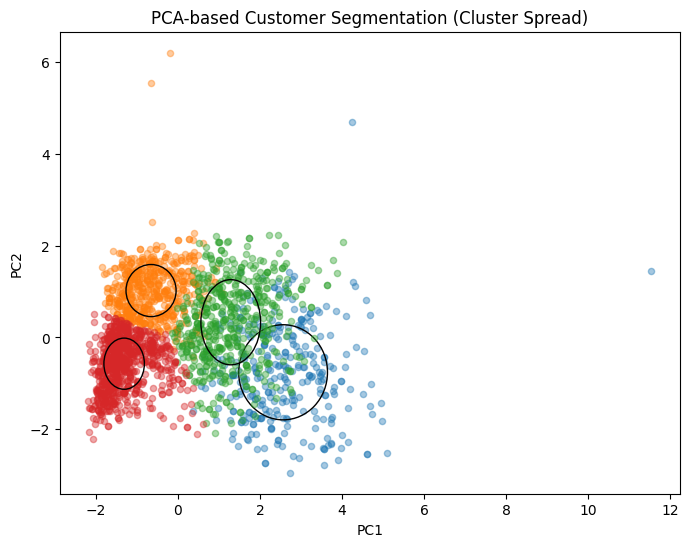

In [31]:
import matplotlib.patches as patches

plt.figure(figsize=(8, 6))

for cluster in pca_df['Cluster'].unique():
    subset = pca_df[pca_df['Cluster'] == cluster]
    
    plt.scatter(subset['PC1'], subset['PC2'], alpha=0.4, s=20)
    
    cov = np.cov(subset[['PC1', 'PC2']].values.T)
    mean = subset[['PC1', 'PC2']].mean().values
    
    eigenvalues, eigenvectors = np.linalg.eig(cov)
    width, height = 2 * np.sqrt(eigenvalues)
    
    ellipse = patches.Ellipse(
        mean, width, height,
        fill=False
    )
    
    plt.gca().add_patch(ellipse)

plt.title("PCA-based Customer Segmentation (Cluster Spread)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [32]:
from sklearn.metrics import silhouette_score


In [33]:
score = silhouette_score(scaled_features, df['Cluster'])
print("Silhouette Score:", score)


Silhouette Score: 0.29801925412504543


In [34]:
cluster_summary = df.groupby('Cluster')[[
    'Income', 
    'MntWines', 
    'MntMeatProducts',
    'Age'
]].mean()

cluster_summary



,Income,MntWines,MntMeatProducts,Age
Cluster,,,,
0,34785.981330,64.680280,35.266044,46.764294
1,46820.566055,162.040367,56.300917,66.493578
2,77746.723975,542.318612,519.946372,53.312303
3,71091.284069,700.879079,284.525912,58.385797


In [35]:
cluster_names = {
    0: 'Budget Customers',
    1: 'Regular Customers',
    2: 'High Value Customers',
    3: 'Premium Customers'
}


In [36]:
df['Customer_Segment'] = df['Cluster'].map(cluster_names)


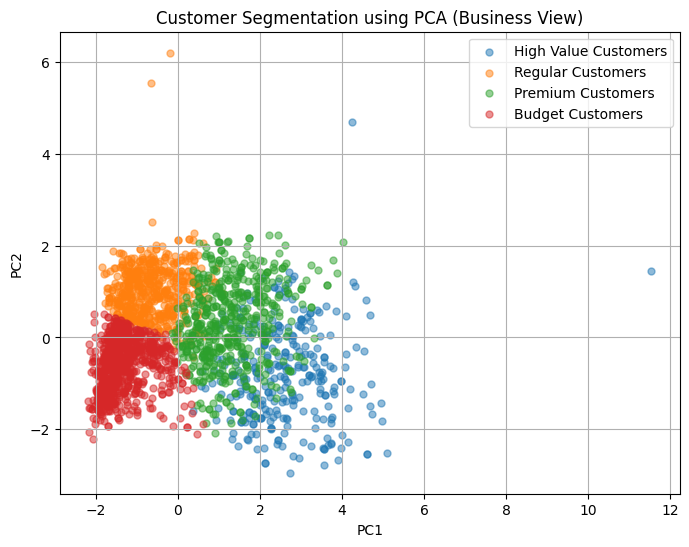

In [37]:
pca_df['Customer_Segment'] = df['Customer_Segment']

plt.figure(figsize=(8, 6))

for segment in pca_df['Customer_Segment'].unique():
    subset = pca_df[pca_df['Customer_Segment'] == segment]
    
    plt.scatter(
        subset['PC1'],
        subset['PC2'],
        alpha=0.5,
        s=25,
        label=segment
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Customer Segmentation using PCA (Business View)")
plt.legend()
plt.grid(True)
plt.show()

